### **[LeetCode Link](https://leetcode-cn.com/problems/permutations/solution/hui-su-suan-fa-python-dai-ma-java-dai-ma-by-liweiw/)**

## 回溯算法与深度优先遍历
### 从全排列问题开始理解回溯算法
我们尝试在纸上写 33 个数字、44 个数字、55 个数字的全排列，相信不难找到这样的方法。以数组 `[1, 2, 3]` 的全排列为例。
* 先写以 1 开头的全排列，它们是：`[1, 2, 3], [1, 3, 2]`，即 1 + `[2, 3]` 的全排列（注意：递归结构体现在这里）；
* 再写以 2 开头的全排列，它们是：`[2, 1, 3], [2, 3, 1]`，即 2 + `[1, 3]` 的全排列；
* 最后写以 3 开头的全排列，它们是：`[3, 1, 2], [3, 2, 1]`，即 3 + `[1, 2]` 的全排列。

总结搜索的方法：按顺序枚举每一位可能出现的情况，已经选择的数字在 当前 要选择的数字中不能出现。按照这种策略搜索就能够做到 不重不漏。这样的思路，可以用一个树形结构表示。
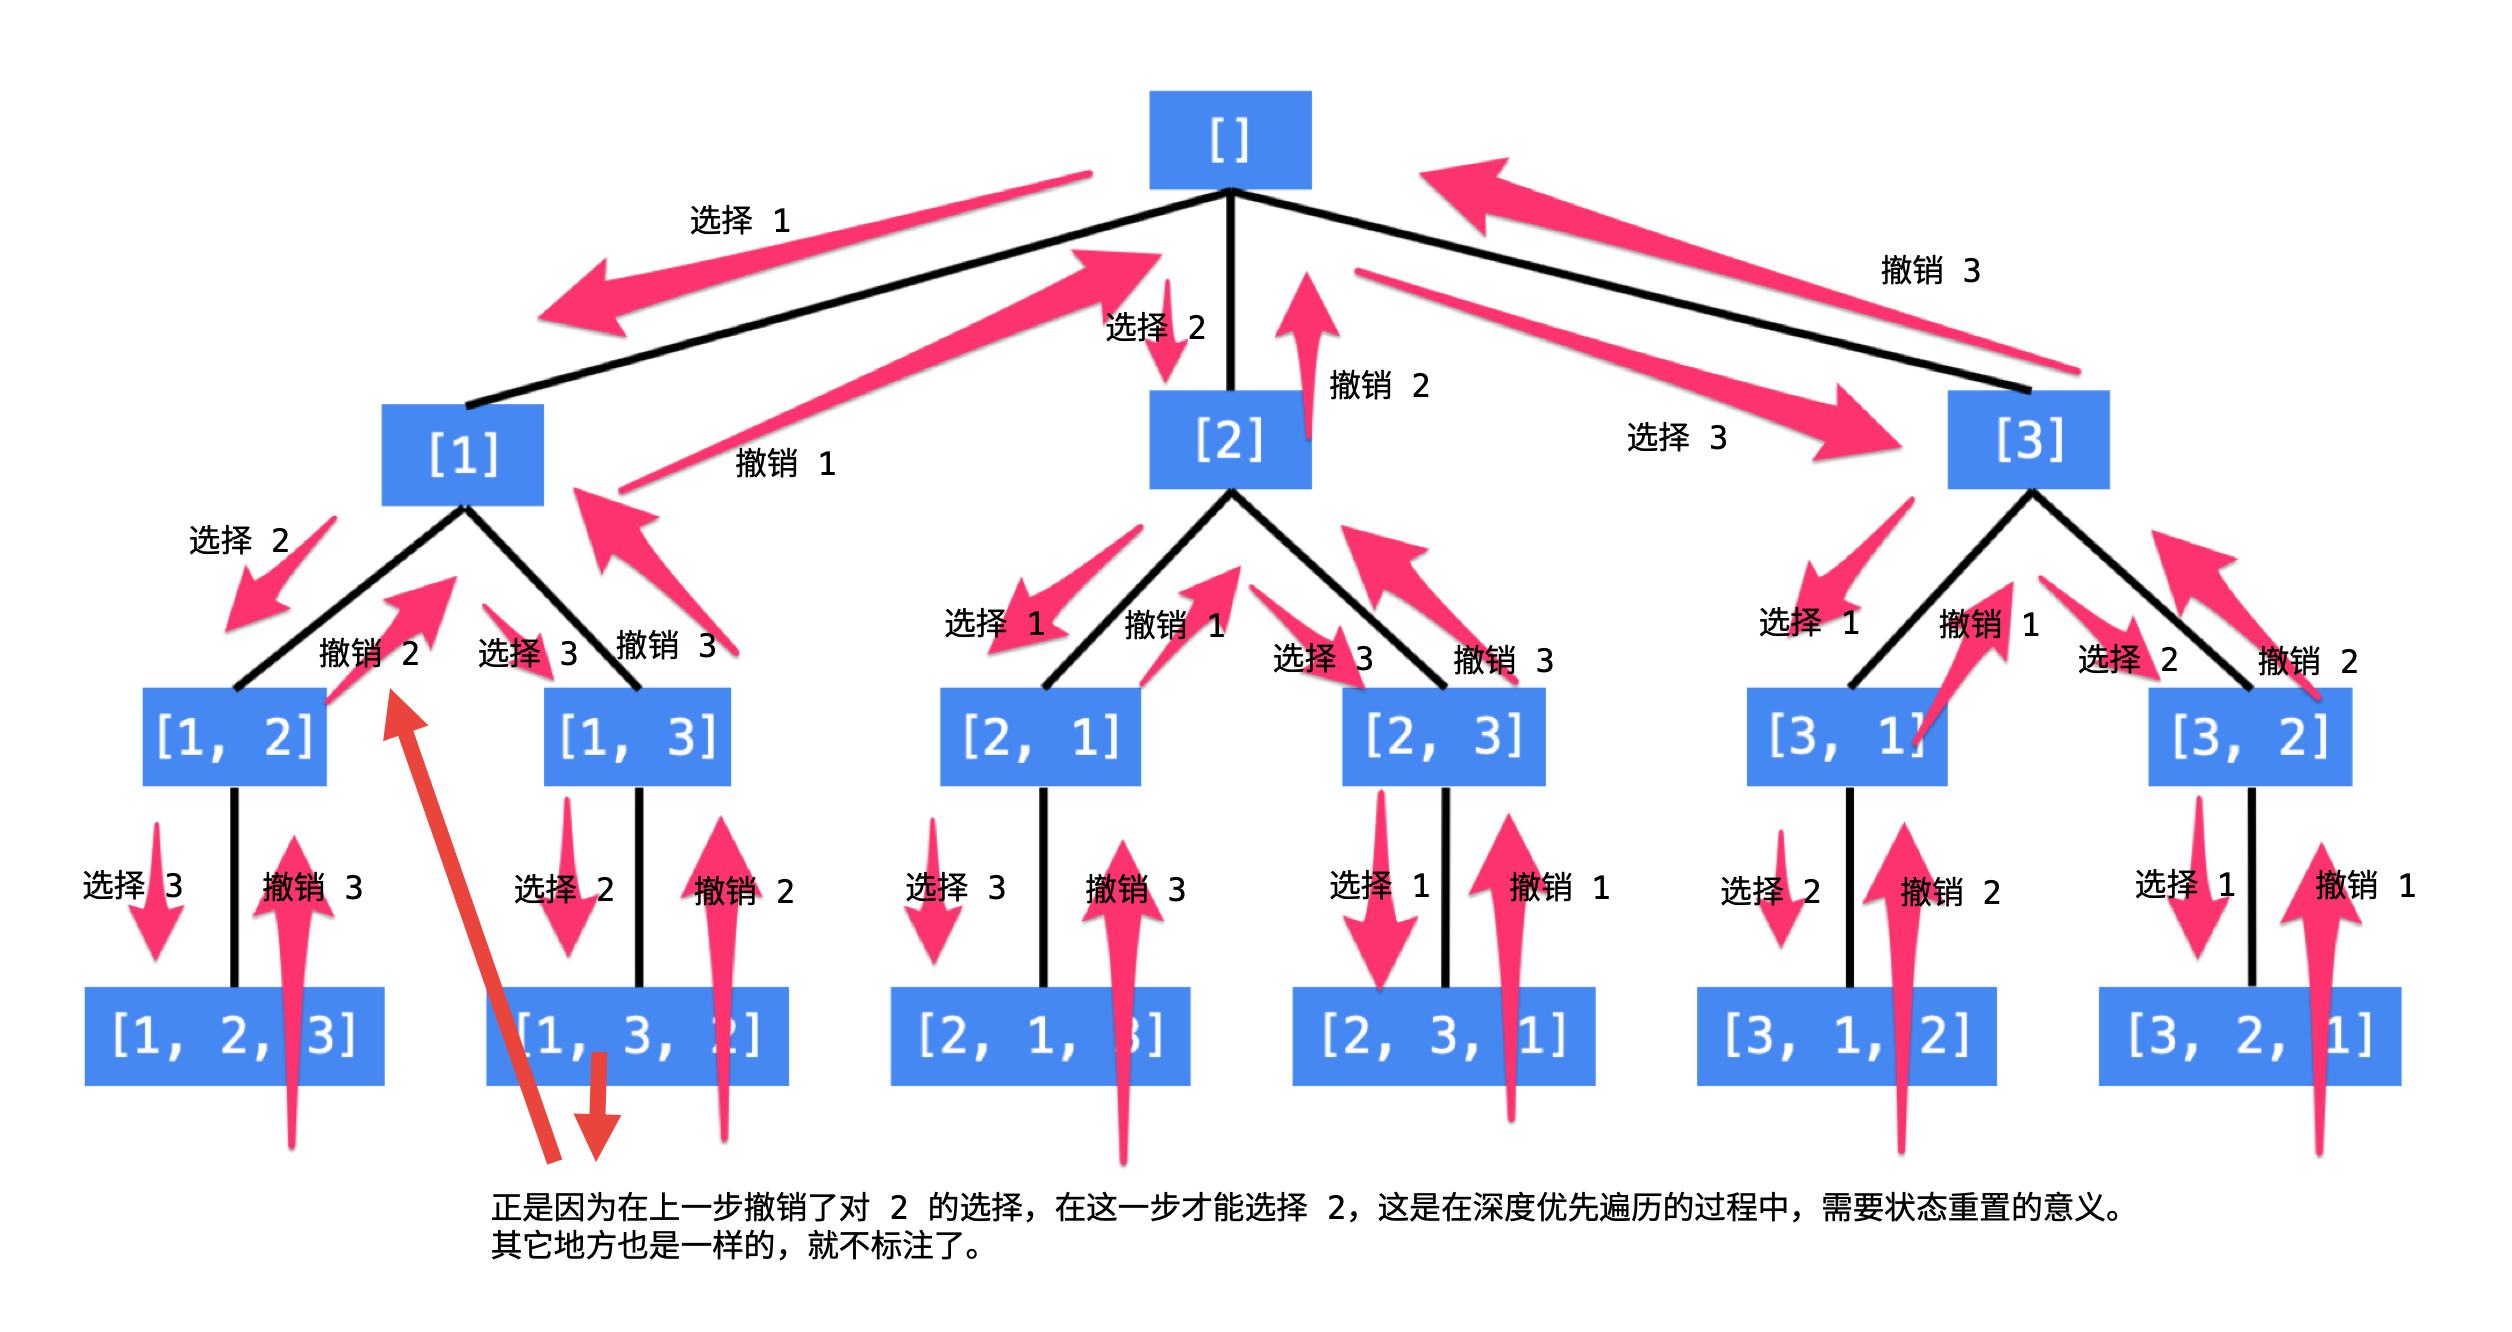

### 说明：
* **每一个结点表示了求解全排列问题的不同的阶段**，这些阶段通过变量的「不同的值」体现，这些变量的不同的值，称之为「状态」；
* 使用深度优先遍历有「回头」的过程，在「回头」以后， **状态变量需要设置成为和先前一样**，因此在回到上一层结点的过程中，需要撤销上一次的选择，这个操作称之为「状态重置」；
* 深度优先遍历，借助系统栈空间，保存所需要的状态变量，在编码中只需要注意遍历到相应的结点的时候，状态变量的值是正确的，具体的做法是：往下走一层的时候，path 变量在尾部追加，而往回走的时候，需要撤销上一次的选择，也是在尾部操作，因此 path 变量是一个栈；
* 深度优先遍历通过「回溯」操作，实现了全局使用一份状态变量的效果。

使用编程的方法得到全排列，就是在这样的一个树形结构中完成 遍历，从树的根结点到叶子结点形成的路径就是其中一个全排列。

### 设计状态变量
* 首先这棵树除了根结点和叶子结点以外，每一个结点做的事情其实是一样的，即：在已经选择了一些数的前提下，在剩下的还没有选择的数中，依次选择一个数，这显然是一个 递归 结构；
* 递归的终止条件是： 一个排列中的数字已经选够了 ，因此我们需要一个变量来表示当前程序递归到第几层，我们把这个变量叫做 depth，或者命名为 index ，表示当前要确定的是某个全排列中下标为 index 的那个数是多少；
* 布尔数组 used，初始化的时候都为 false 表示这些数还没有被选择，当我们选定一个数的时候，就将这个数组的相应位置设置为 true ，这样在考虑下一个位置的时候，就能够以 ${O}(1)$ 的时间复杂度判断这个数是否被选择过，这是一种「以空间换时间」的思想。

这些变量称为「状态变量」，它们表示了在求解一个问题的时候所处的阶段。需要根据问题的场景设计合适的状态变量。

### 复杂度分析：
回溯算法由于其遍历的特点，时间复杂度一般都比较高，有些问题分析起来很复杂。一些回溯算法解决的问题，剪枝剪得好的话，复杂度会降得很低，因此分析最坏时间复杂度的意义也不是很大。但还是视情况而定。
* 时间复杂度：$O(N \times N!)$
* 空间复杂度：$O(N \times N!)$。
 * 递归树深度 $\log N$；
 * 全排列个数 $N!$，每个全排列占空间 $N$。取较大者。

In [ ]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        def dfs(nums, size, depth, path, used, res):
            if depth == size:
                res.append(path[:])
                return

            for i in range(size):
                if not used[i]:
                    used[i] = True
                    path.append(nums[i])

                    dfs(nums, size, depth + 1, path, used, res)

                    used[i] = False
                    path.pop()

        size = len(nums)
        if len(nums) == 0:
            return []

        used = [False for _ in range(size)]
        res = []
        dfs(nums, size, 0, [], used, res)
        return res